# NLP Exploratory Data Exploration (EDA) on Vegan Articles  
---  



In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = r"C:\Users\19802\Documents\dev\Vegan_Articles.csv"

In [5]:
df=pd.read_csv(file)

In [14]:
df.head(3)

,Title,Link,Date,Text
0,Vegan Athlete Wins ‘World’s Toughest Race’ For...,https://plantbasednews.org/culture/sport/vegan...,07/21/2021,Vegan ultrarunner Harvey Lewis just snagged fi...
1,How The Meat Industry Is Mimicking Tobacco Gia...,https://plantbasednews.org/news/environment/me...,07/21/2021,The meat industry across the globe is mimickin...
2,Vegan Cheese Company Hit By Vandalism Prompts ...,https://plantbasednews.org/lifestyle/food/vega...,07/21/2021,A London-based artisan vegan cheese company ha...


In [15]:
df.describe()

,Title,Link,Date,Text
count,27651,27651,27651,27651
unique,27599,27622,4234,27604
top,COVER CRYSTAL BALL,https://vegnews.com/2015/10/mainstream-mondays,05/01/2018,
freq,4,3,29,13


## Analyze Text Statistics     
  
First, lets loko at the number of charcters present in the titles.

<AxesSubplot:>

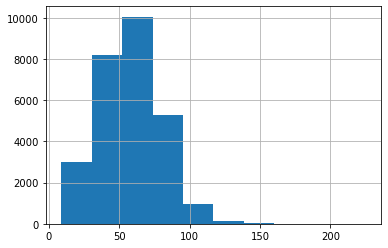

In [7]:
df["Title"].str.len().hist()

This shows titles range between 20 to 100 characters generally.  
  
Now the looking at text.

<AxesSubplot:>

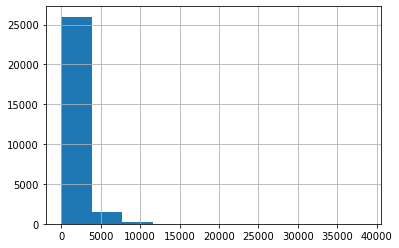

In [8]:
df["Text"].str.len().hist()


The number of words in the titles ranges from 0 to 1000 and mostly falls between 0 to 4500 words.

Check the average word length in each sentence.



<AxesSubplot:>

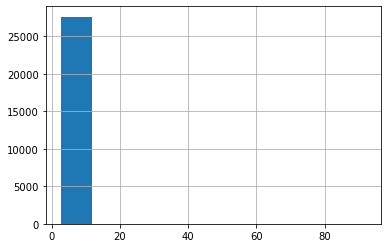

In [17]:
df['Title'].str.split().\
    apply(lambda x : [len(i) for i in x]). \
    map(lambda x: np.mean(x)).hist()

The average word length ranges between 5 to 15.   
  
Does it mean that people are using really short words in Titles?

---  

## Stopwords

In [37]:
import nltk  
from nltk.corpus import stopwords


nltk.download('stopwords')
stop=set=(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19802\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Create corpus

corpus=[]
title=df["Title"].str.split()  
title=title.values.tolist()  
corpus=[word for i in title for word in i]  



In [23]:
from collections import defaultdict  
dic=defaultdict(int)
for word in corpus:  
    if word in stop:
        dic[word]+=1

In [35]:
def plot_top_stopwords_barchart(text):

    
    title= text.str.split()
    title=title.values.tolist()
    corpus=[word for i in title for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

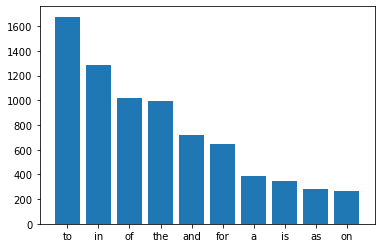

In [38]:
plot_top_stopwords_barchart(df['Title'])


Counter function from the collections library -  good to count and store the occurrences of each word in a list of tuples. 
  
  This is a very useful function when we deal with word-level analysis in natural language processing

<AxesSubplot:>

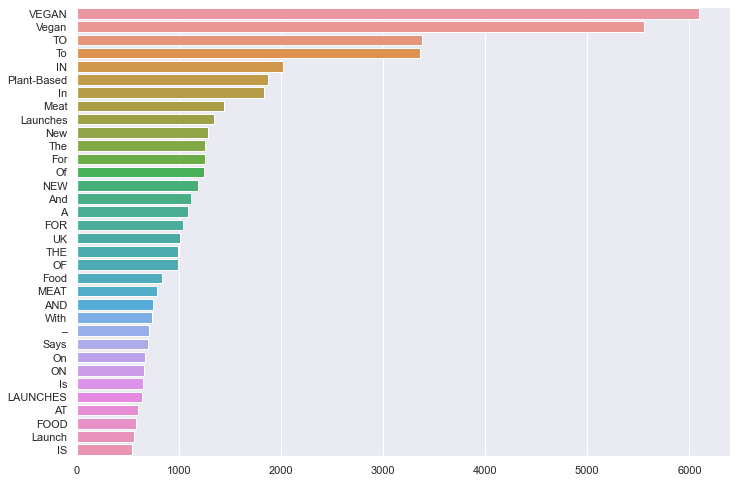

In [43]:
from collections import Counter
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x, )

---  
## <u>References</u>  
- [EDA-NLP Neputune AI](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)  

- [Data from Kaggle](https://www.kaggle.com/adrinlandaverdenava/vegan-news)  


---  